In [27]:
# Importar librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

In [28]:
edu = pd.read_csv('Diamonds are forever.csv', na_values = ':',
                   usecols = ["Carat","Colour","Clarity", "Lab", "Price ($US)"])
edu

,Carat,Colour,Clarity,Lab,Price ($US)
0,0.30,1,5,1,911.4
1,0.30,2,4,1,1057.0
2,0.30,4,2,1,1057.0
3,0.30,4,4,1,882.0
4,0.31,1,4,1,1148.7
...,...,...,...,...,...
303,1.01,6,4,3,5722.5
304,1.02,3,3,3,7557.2
305,1.06,5,3,3,6923.0
306,1.02,5,5,3,6271.3


In [29]:
# Verificar si hay datos perdidos
edu.isnull().sum()

Carat          0
Colour         0
Clarity        0
Lab            0
Price ($US)    0
dtype: int64

/home/santiago/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


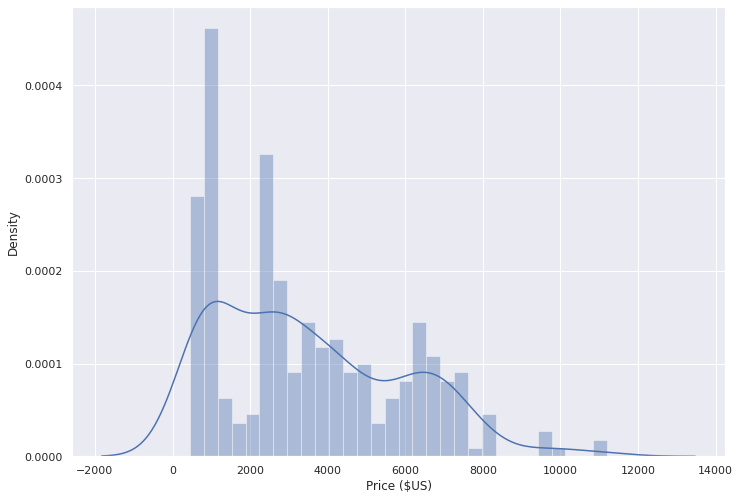

In [31]:
# Se utiliza displot de la librería seaborn para
# un análisis preliminar
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(edu['Price ($US)'], bins=30)
plt.show()

/home/santiago/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


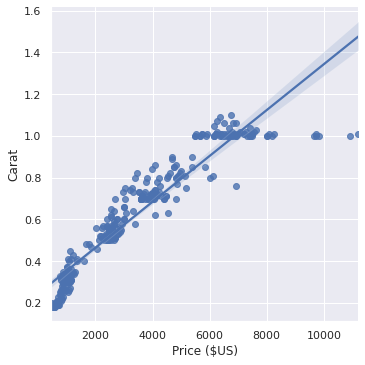

In [32]:
# Analisis de relación de características 
# específicas con la variable dependiente
sns.lmplot("Price ($US)", "Carat", edu)

/home/santiago/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


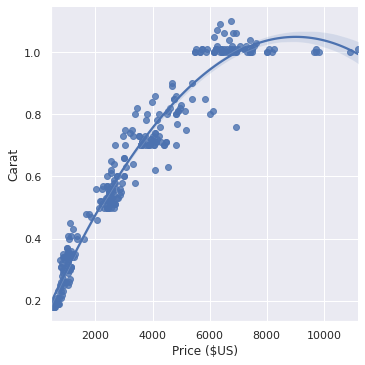

In [33]:
# Probar un modelo de orden 2 entre
# la variable Price ($US) y Carat
sns.lmplot("Price ($US)", "Carat", edu, order = 2)

<AxesSubplot:>

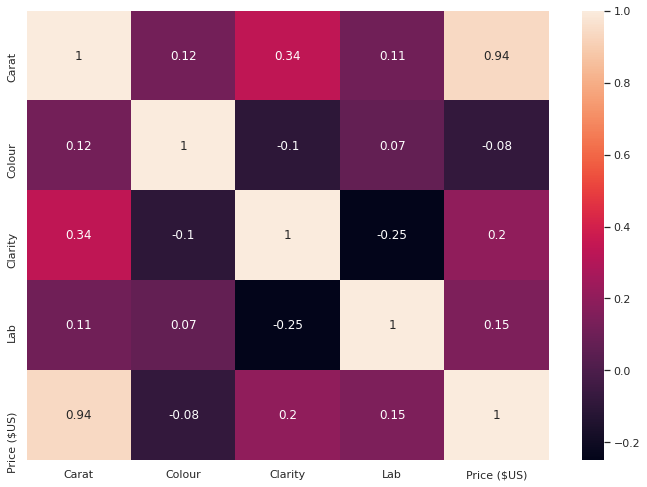

In [34]:
# Se obtiene una matriz de correlación
correlation_matrix = edu.corr().round(2)
# Se usa la matriz de correlación para dibujar un mapa de calor
# annot = True para mostrar los valores dentro del cuadro
sns.heatmap(data=correlation_matrix, annot=True)

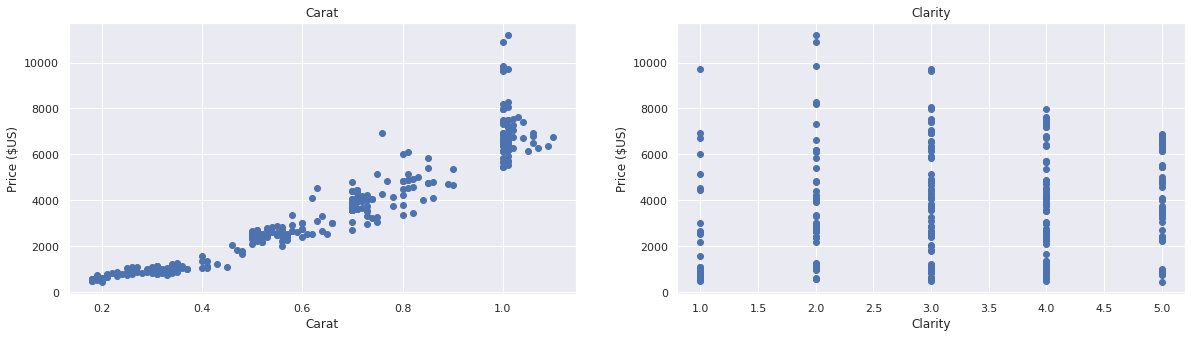

In [35]:
# Se revisa la correlación de las variables LSTAT y RM con PRICE
plt.figure(figsize=(20, 5))

features = ['Carat', 'Clarity']
target = edu['Price ($US)']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = edu[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price ($US)')

In [38]:
# Se preparan los datos para el entrenamiento del modelo
# Se concatenan las variables LSTAT y RM usando np.c_
X = pd.DataFrame(np.c_[edu['Price ($US)'], edu['Carat']], columns = ['Price ($US)','Carat'])
Y = edu['Price ($US)']

In [39]:
# Se dividen los datos en datos de entrenamiento y validación
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(246, 2)
(62, 2)
(246,)
(62,)


In [40]:
# Se entrena y prueba el modelo de aprendizaje
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [41]:
# Se evalua el modelo de entrenamiento con las medidas RMSE y R2-score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print('Coeficiente: ', lin_model.coef_)
print('Interceptor: ', lin_model.intercept_)

print("Rendimiento del modelo para el conjunto de entrenamiento")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 score es {}'.format(r2))
print("\n")

# Evaluación del modelo de prueba
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("Rendimiento del modelo para el conjunto de prueba")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print('R2 score es {}'.format(r2))

Coeficiente:  [ 1.00000000e+00 -4.63596094e-13]
Interceptor:  4.547473508864641e-12
Rendimiento del modelo para el conjunto de entrenamiento
--------------------------------------
RMSE es 4.958756139149752e-12
R2 score es 1.0


Rendimiento del modelo para el conjunto de prueba
--------------------------------------
RMSE es 4.992689255756202e-12
R2 score es 1.0
